## Machine Learning - Ex.7


Submitted by: [**enter your name/s**]

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


### The K-means algorithm

Implement the K-means algorithm:

Your function should get the $n\times d$ samples matrix (one in each row) and the number of clusters K.

Init the K cluster centers $\mu_j,\ \ j=0,..,K-1$ with a random choice out of the K samples.

Then iterate the algorithm's two steps, until convergence (no change in the samples assignments):

**step 1:** sample assignment:

**step 2:** update cluster centers:

Your function should return:
1. a vector $y\in R^n$ of the final assingments:
$$y_i\in\{0,1,..,K-1\}$$
2. a matrix C (of size $k\times d$) containing all the *clusters centers* (one in each row).
3. The total cost $J$ of the final solution.

Test your function on the simple 2-D data below.


hint: matplotlib's *scatter* plot might come handy for visualization: <https://matplotlib.org/gallery/shapes_and_collections/scatter.html>



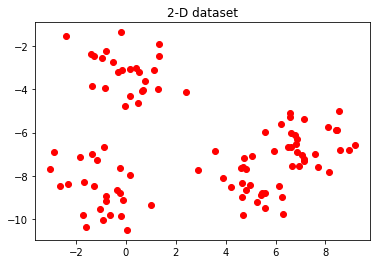

In [4]:
data=np.loadtxt('samples2D.csv', delimiter=',')

plt.plot(data[:,0],data[:,1],'or')
plt.title('2-D dataset')
plt.show()

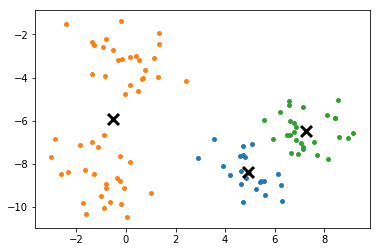

In [5]:
def kmean(X, K):
    
    # your code here..
    
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    #random initialization of centroids
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m),:]
 
    for f in range(50):
            idx = np.zeros((X.shape[0],1))
            temp = np.zeros((centroids.shape[0],1))


            for i in range(X.shape[0]):
                for j in range(K):
                    dist = X[i,:] - centroids[j,:]
                    length = np.sum(dist**2)
                    temp[j] = length
                idx[i] = np.argmin(temp)+1
                
            #calculate J (cost)
            J=0
            for i in range(m):
                index = int((idx[i]-1)[0])
                J = J + (np.linalg.norm(X[i]-centroids[index]) ** 2)
            
            
            #updating centroid
            centroid_mean = np.zeros((K,n))
            count = np.zeros((K,1))

            for i in range(m):
                index = int((idx[i]-1)[0])
                centroid_mean[index,:]+=X[i,:]
                count[index]+=1


            C=centroid_mean/count
            centroids=C
    
    
    
    
    
    
    return  idx,C, J
K=3
X=data

y, C, J=kmean(X, K)

#color=["red", "blue", "green", "orange"]
for k in range(1,K+1):
    grp = (y==k).reshape(data.shape[0],1)
    plt.scatter(X[grp[:,0],0],X[grp[:,0],1],cmap=plt.cm.rainbow,s=15)
    
plt.scatter(C[:,0],C[:,1],s=120,marker="x",c="black",linewidth=3)

In [6]:
print('Cost =', J)
print('Centroids =', C)
print('y shape =', y.shape)

Cost = 559.6655505703696
Centroids = [[ 4.92090909 -8.40068182]
 [-0.5090256  -5.90738   ]
 [ 7.27882143 -6.46296429]]
y shape = (100, 1)


### Repeat with different initializations

In order to try and avoid *local minima*, you will run the `k-means` algorithm $N=100$ times, each time with a different random initialization, and return the results (y, C, J) of the best run (the one with the minimal J).



In [7]:
def kmeans_repeat1(X, K, N):
    
    # (should call 'kmeans' N times and pick the best solution)
    
    for k in range(K):
        best_y, best_C, best_J = 0, 0, float('nan')
        
        while (np.isnan(best_J)):
            best_y, best_C, best_J = kmean(X, k+1)   
        #print(np.isnan(best_J))
        for n in range(N-1): # to avoid local minimum
            y, C, J = kmean(X, k+1)
            
            if (J < best_J and J != 0):
                best_y, best_C, best_J = y, C, J
    
    return best_y, best_C, best_J


In [8]:
k=3 #change k=8 according to the questions requirement
N=20
best_y, best_C, best_J=kmeans_repeat1(data, k, N)

False
False
False


## Plotting centroids and data

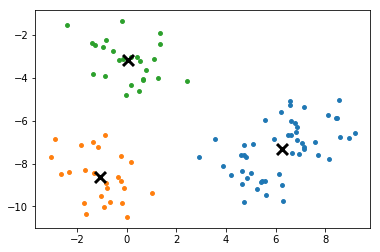

In [9]:
for k in range(1,K+1):
    grp = (best_y==k).reshape(data.shape[0],1)
    plt.scatter(data[grp[:,0],0],data[grp[:,0],1],cmap=plt.cm.rainbow,s=15)
    
plt.scatter(best_C[:,0],best_C[:,1],s=120,marker="x",c="black",linewidth=3)

## Result with different random initialization.

In [10]:
print('Centroids with least solution cost =\n',best_C)
print('lowest cost =',best_J)
print(y.shape)
y[:,0].shape

Centroids with least solution cost =
 [[ 6.24134   -7.31556  ]
 [-1.0597688 -8.6266   ]
 [ 0.0417176 -3.18816  ]]
lowest cost = 289.54641441072005
(100, 1)


(100,)

### Determine the optimal number of clusters
In order to choose the number of clusters K, run `kmeans_repeat` on the data, each time with a different value of K (try K=1,..,8).

Plot the final result for each K (scatter plot of the data with each cluster marked by a different color).

Finally, plot the final J value as a function of K, in order to choose the K.

False


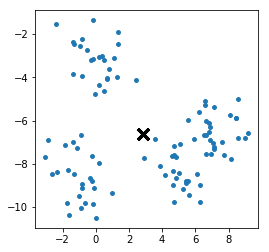

False


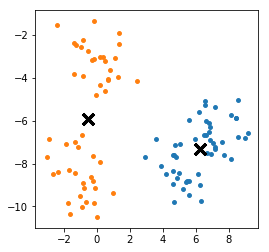

False


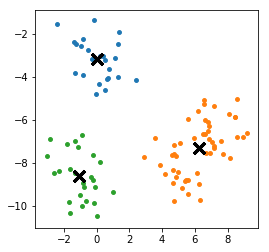

False


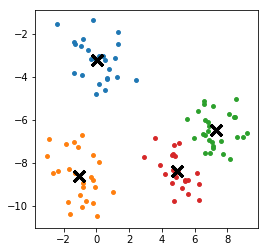

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


False


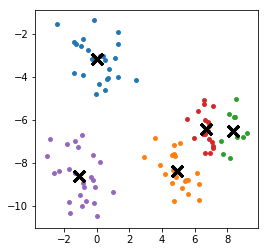

False


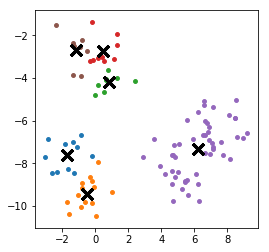

False


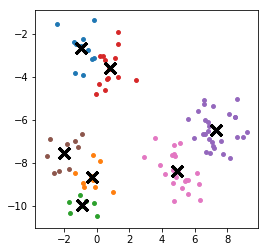

False


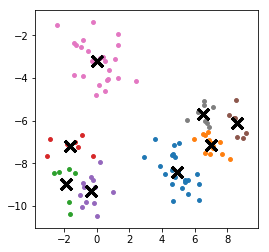

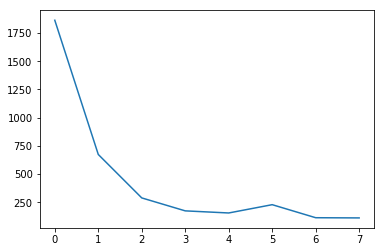

The best clusters num is: 4


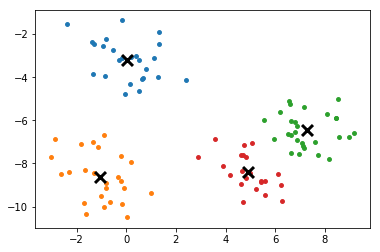

In [11]:
# your code here.. 
def kmeans_repeat(X, K, N = 100, plot_X = 0):

    n, d = X.shape
    y_arr = [[]]
    C_arr = [[],[]]
    J_arr = []
    
    
    for k in range(K):
        best_y, best_C, best_J = 0, 0, float('nan')
        
        while (np.isnan(best_J)):
            best_y, best_C, best_J = kmean(X, k+1)   
        print(np.isnan(best_J))
        for n in range(N-1): # to avoid local minimum
            y, C, J = kmean(X, k+1)
            y=y[:,0]
            
            if (J < best_J and J != 0):
                best_y, best_C, best_J = y, C, J
        
        y_arr.append(best_y)
        C_arr.append(best_C)
        J_arr.append(best_J)
        
        plt.figure(figsize=(4,4))
        for k in range(1,K+1):
            grp = (best_y==k).reshape(data.shape[0],1)
            plt.scatter(X[grp[:,0],0],X[grp[:,0],1],cmap=plt.cm.rainbow,s=15)
        
            plt.scatter(best_C[:,0],best_C[:,1],s=120,marker="x",c="black",linewidth=3)
        plt.show()

        
        #if (plot_X != 0):
            
            
            #plt.scatter(X[:,0], X[:,1], 100, best_y, cmap=plt.cm.rainbow)
            #plt.show()
    
    plt.plot(J_arr)
    plt.show()
        
    # Choosing the best K
    best_k = 0
    all_J_sum = 0
    for i in range(K):
        all_J_sum = all_J_sum + J_arr[i]
    
    percision = all_J_sum * 0.8
    curr_J_sum = 0
    
    for i in range(K):
        curr_J_sum = curr_J_sum + J_arr[i]
        if (curr_J_sum > percision):
            best_k = i + 1
            print("The best clusters num is:", best_k)
            break
    #print(C_arr)    
    return y_arr[best_k], C_arr[best_k+1], J_arr[best_k], best_k
X=data
y, C, J, K = kmeans_repeat(X, 8, 2, 1)
for k in range(1,K+1):
    grp = (y==k).reshape(data.shape[0],1)
    plt.scatter(X[grp[:,0],0],X[grp[:,0],1],cmap=plt.cm.rainbow,s=15)
    
plt.scatter(C[:,0],C[:,1],s=120,marker="x",c="black",linewidth=3)

# plt.scatter(X[:,0], X[:,1], 100, y, cmap=plt.cm.rainbow)
# plt.show()


### Higher dimensional data

Load the `digits` dataset.

Pick only the samples of digit `4` (how many samples of it are there?)

Lets try to cluster these samples into K=3 clusters. Display each of the resulting clusters centroids.




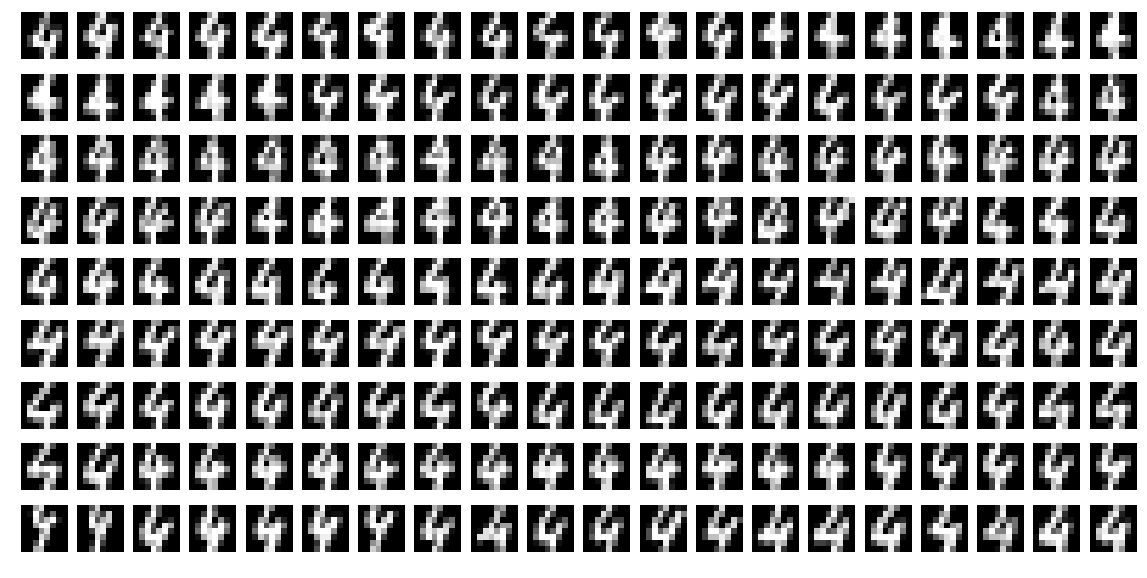

In [52]:
from sklearn import datasets

digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target
data=X[y==4]


plt.figure(figsize=(20,10))
for i in range(180):
    plt.subplot(9,20,i+1)
    plt.imshow(data[i].reshape(8,8),cmap='gray')
    plt.axis('off')
    plt.axis('equal')

# algorithm on single example [4]

False
False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


False
cluster centroids for this example : 
 [[ 0.85714286  1.95238095]
 [12.66666667  1.5       ]
 [ 9.8        14.2       ]]


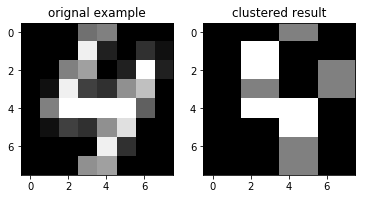

In [74]:
X4=digits.data[y==4]
a=X4[np.random.randint(0,X4.shape[0])].reshape(32,2)
best_y, best_C, best_J=kmeans_repeat1(a, 3, 50)
Xs_recovered = a.copy()
for i in range(1,3+1):
    Xs_recovered[(best_y==i).ravel(),:] = i
    
recovered=Xs_recovered.reshape(8,8)
fig, ax = plt.subplots(1,2)
ax[0].imshow(a.reshape(8,8), cmap='gray')
ax[0].set_title("orignal example")
ax[1].imshow(recovered.reshape(8,8), cmap='gray')
ax[1].set_title("clustered result")
print('cluster centroids for this example : \n', best_C)

# function for plotting all samples 

In [60]:
def plotting(best_y, a_recovered, x):
        
        for i in range(1,3+1):
            a_recovered[(best_y==i).ravel(),:] = i
        recovered=a_recovered.reshape(x.shape[0],64)
        plt.figure(figsize=(100,50))
        for i in range(1,int(x.shape[0])):
            plt.subplot(int(x.shape[0]/20)+1,20,i)
            plt.imshow(recovered[i].reshape(8,8),cmap='gray')
            plt.axis('off')
            plt.axis('equal')

False
False
False
cluster centroids for all samples : 
 [[13.49039265  3.00501253]
 [ 8.32865583 13.81166913]
 [ 0.5689602   1.44153039]]


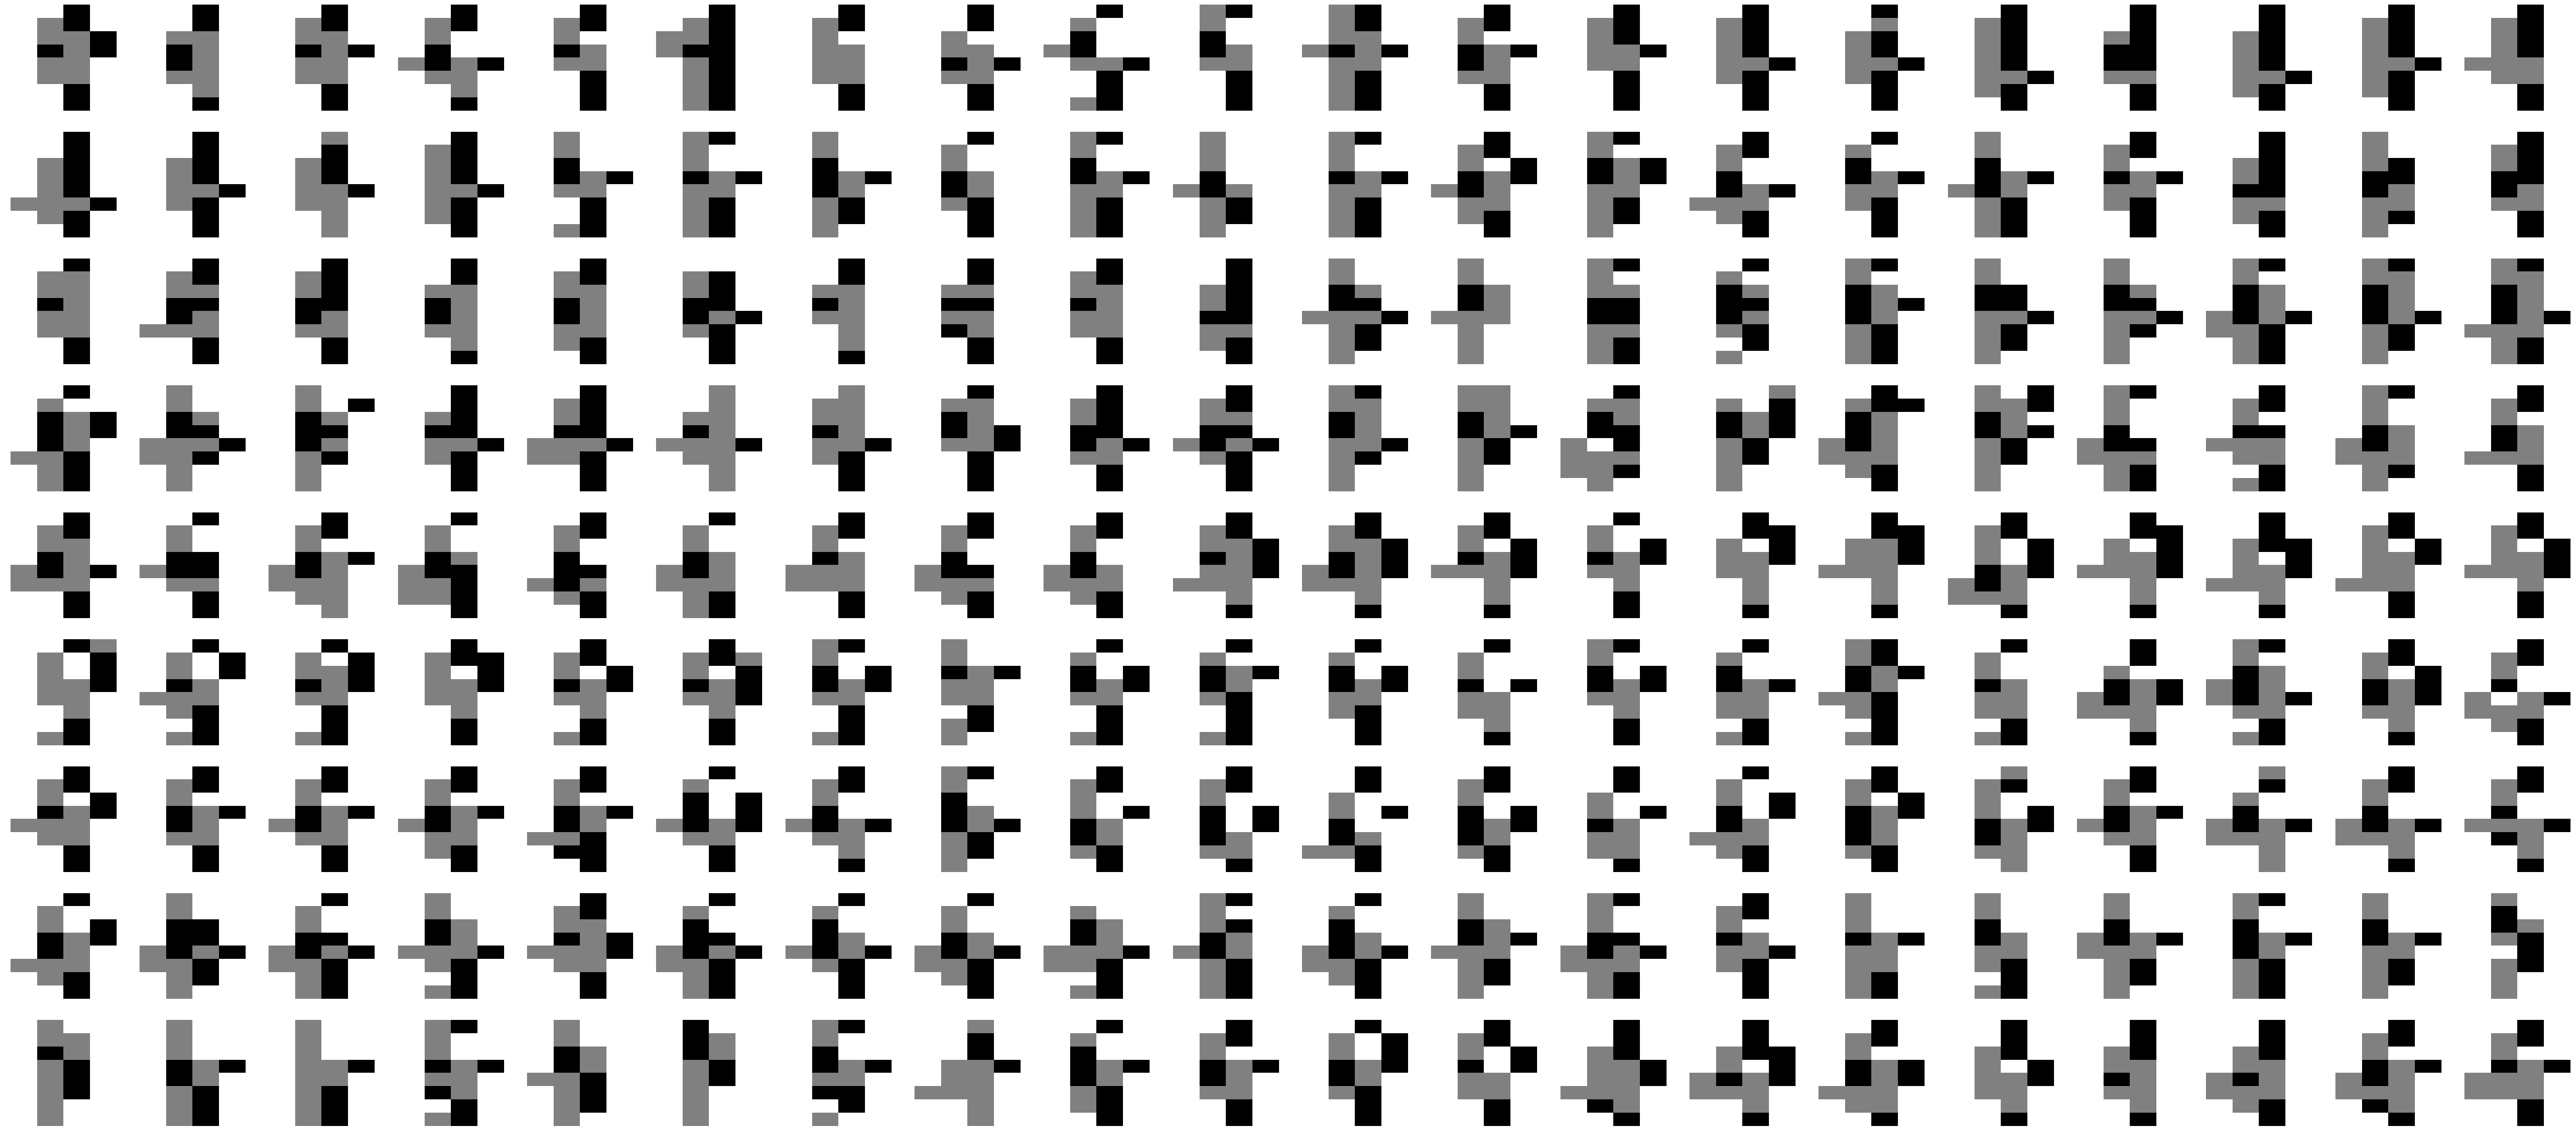

In [73]:
# your code here...

X4 = digits.data[y==4]
a=X4.reshape(int(X4.size/2),2)
best_y, best_C, best_J=kmeans_repeat1(a, 3, 1)
a_recovered = a.copy()
plotting(best_y,a_recovered,X4)
print('cluster centroids for all samples : \n', best_C)

9


- Finally, repeat the same analysis for each of the other digits (`0`-`9`) as well:

# individual example from 0 to 9 samples

Digit =  8
False
False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


False
cluster centroids for this example : 
 [[ 0.33333333  1.61111111]
 [12.66666667 13.        ]
 [10.875       2.125     ]]


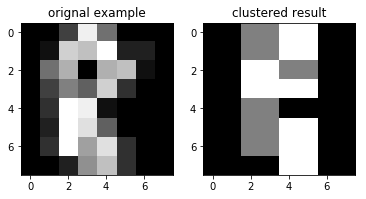

In [76]:
digit=np.random.randint(0,9) #pickig up indiidual number from 0 to 9
print('Digit = ', digit)
X_in=digits.data[y==digit]
ran_choice=np.random.randint(0,X_in.shape[0])
a=X_in[ran_choice].reshape(32,2)
best_y, best_C, best_J=kmeans_repeat1(a, 3, 50)
Xs_recovered = a.copy()
for i in range(1,3+1):
    Xs_recovered[(best_y==i).ravel(),:] = i
    
recovered=Xs_recovered.reshape(8,8)
fig, ax = plt.subplots(1,2)
ax[0].imshow(a.reshape(8,8), cmap='gray')
ax[0].set_title("orignal example")
ax[1].imshow(recovered.reshape(8,8), cmap='gray')
ax[1].set_title("clustered result")

print('cluster centroids for this example : \n', best_C)

# Applying on whole sample of an individual digits

False
False
False


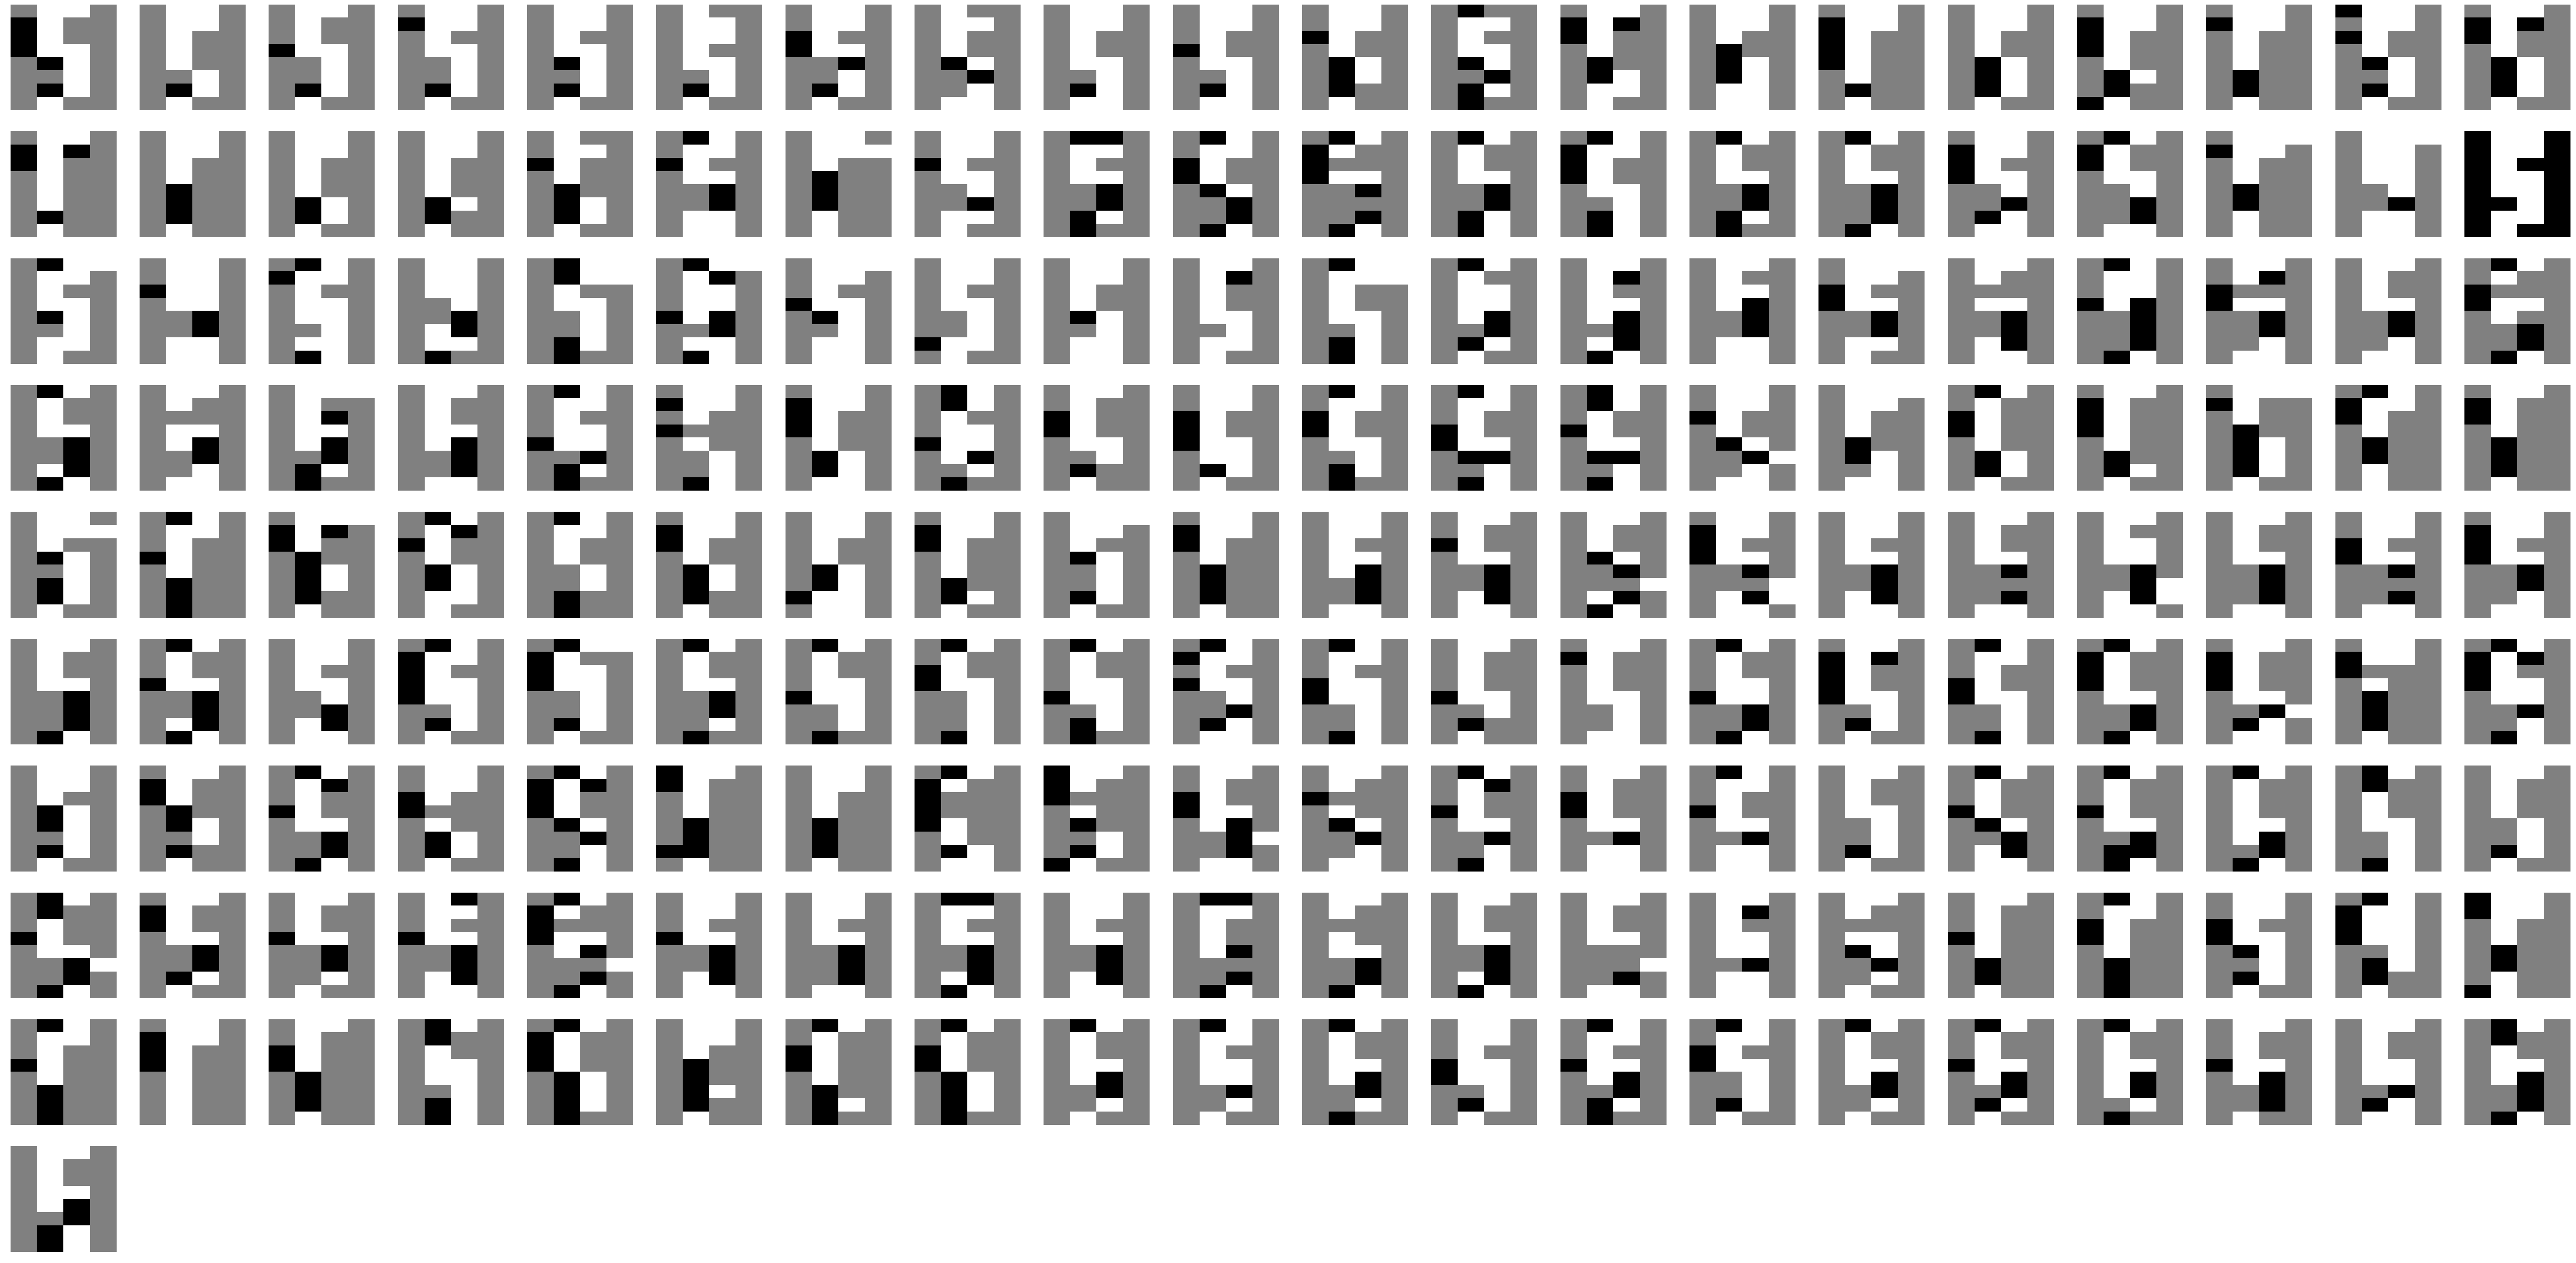

In [68]:
# your code here...
X_in = digits.data[y==digit]
a=X_in.reshape(int(X_in.size/2),2)
best_y, best_C, best_J=kmeans_repeat1(a, 3, 1)
a_recovered = a.copy()
plotting(best_y,a_recovered,X_in)
print('cluster centroids for all samples : \n', best_C)


In [42]:
int(X.shape[0]/20+1)

10

## Good luck !